## Python notebook 
V nasledujúcom notebooku sú popísané Python metódy použité na predspracovanie dát pre metódy nekontrolovaného učenia. Obsah notebooku je nasledujúci:
1. Import potrebných knižníc
2. Predspracovanie dát

# 1. Import potrebných knižníc

In [2]:
!pip install opencv-python

     |████████████████████████████████| 60.4 MB 38.9 MB/s eta 0:00:01


In [3]:
import numpy as np
import cv2 #obrazok na pole konverzia
import os
import random
import matplotlib.pyplot as plt
import pickle

import pandas as pd
import sklearn.metrics
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow, show

# 2. Predspracovanie dát

Extrahované udalosti premeníme na číselnú reprezentáciu a uložíme do premennej typu array. Zamiešame poradie a spracované dáta uložíme do pickle súborov.

In [4]:
#DIRECTORY - cesta ku obrazkom
#CATEGORIES - obrazky podla kategorie S - spheric, T - tweek
DIRECTORY2 = r'/home/jovyan/data/lightning/Samuel/git/tweeks_detection/2014_Data_Cropped'
CATEGORIES2 = ['2014_11_cropped_S', '2014_11_cropped_T']

In [10]:
#prejde folder, upravy obrazok a vytvori pole obrazok, label, nazov obrazku
data2 = []

for category in CATEGORIES2:
    folder = os.path.join(DIRECTORY2, category)
    label = CATEGORIES2.index(category)
    for img in os.listdir(folder):
        img_path = os.path.join(folder, img)
        #print(img_path)
        if(img_path == '/home/jovyan/data/lightning/Samuel/git/tweeks_detection/2014_Data_Cropped/2014_11_cropped_S/.DS_Store'):
            continue
        if(img_path == '/home/jovyan/data/lightning/Samuel/git/tweeks_detection/2014_Data_Cropped/2014_11_cropped_T/.DS_Store'):
            continue
        if(img_path == '/home/jovyan/data/lightning/Samuel/git/tweeks_detection/2014_Data_Cropped/2014_11_cropped_S/.ipynb_checkpoints'):
            continue
        if(img_path == '/home/jovyan/data/lightning/Samuel/git/tweeks_detection/2014_Data_Cropped/2014_11_cropped_T/.ipynb_checkpoints'):
            continue
        img_arr = cv2.imread(img_path)
        img_arr = cv2.cvtColor(img_arr, cv2.COLOR_BGR2RGB)
        img_arr = cv2.resize(img_arr, (40, 150))
        data2.append([img_arr, label, img])

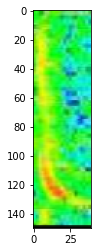

In [11]:
plt.imshow(img_arr)

In [12]:
len(data2)

13647

In [13]:
#rozdeli pole na jednotlive polozky a vytvori korespondujuce pickle subory
random.seed(100)
random.shuffle(data2)

In [16]:
data = []
label = []
img = []

for datas, labels, imgs in data2:
    data.append(datas)
    label.append(labels)
    img.append(imgs)

In [24]:
data = np.array(data)
label = np.array(label)
img = np.array(img)

In [25]:
pickle.dump(data, open('data/data_2014_11.pkl', 'wb'))
pickle.dump(label, open('data/label_2014_11.pkl', 'wb'))
pickle.dump(img, open('data/img_name.pkl', 'wb'))